<a href="https://colab.research.google.com/github/sheinviktoriia/Data-analyst-home-works-/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 53.6 MB/s eta 0:00:00


In [4]:
import mysql.connector
from mysql.connector.connection import MySQLConnection
import pandas as pd
import datetime

2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [35]:
con = mysql.connector.connect(user='user1', password='7oygWy6P',
                              host='3.68.62.36',
                              database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [36]:
cursor = con.cursor()

In [37]:
sql = """
SELECT MAX(hire_date), MIN(hire_date) FROM employees
"""

In [8]:
cursor.execute(sql)

In [9]:
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [38]:
sql = """
SELECT emp_no, salary, from_date, to_date
FROM salaries
WHERE (emp_no, to_date) IN (
    SELECT emp_no, MAX(to_date)
    FROM salaries
    GROUP BY emp_no
    )
"""

In [39]:
import warnings

warnings.filterwarnings('ignore')

In [41]:
res = pd.read_sql(sql, con)
display (res.columns, res.shape, res.head(3))

Index(['emp_no', 'salary', 'from_date', 'to_date'], dtype='object')

(300180, 4)

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [17]:
res.to_date.map(type).head()

0    <class 'datetime.date'>
1    <class 'datetime.date'>
2    <class 'datetime.date'>
3    <class 'datetime.date'>
4    <class 'datetime.date'>
Name: to_date, dtype: object

In [29]:
equal_9999_01_01 = 0
non_9999_01_01 = 0
date_to_count = datetime.date(9999, 1, 1)

In [30]:
for date in res.to_date:
  if date == date_to_count:
    equal_9999_01_01 += 1
  else:
    non_9999_01_01 += 1
print(f"Значень, які дорівнюють '9999-01-01' - {equal_9999_01_01}, решта - {non_9999_01_01}")

Значень, які дорівнюють '9999-01-01' - 240124, решта - 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

In [31]:
import matplotlib.pyplot as plt

In [32]:
current_employees = res[res['to_date'] == date_to_count]

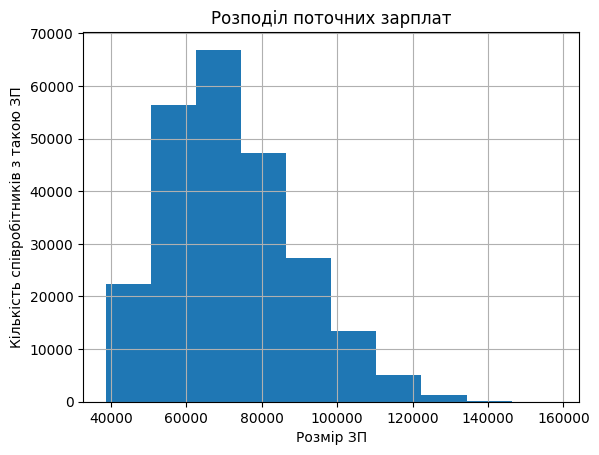

In [33]:
current_employees['salary'].hist()
plt.title('Розподіл поточних зарплат')
plt.xlabel('Розмір ЗП')
plt.ylabel('Кількість співробітників з такою ЗП');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [42]:
con.close()